#**DSE Final Project**
###*Created by Allison Gohl, Kindeep Dhatt, Maria Doda and Ann Mansour*
###*Detroit Medical Center Dataset*

#**Below are the steps we did for downloading Panda libraries. We Imported the datasets required for this project and did some data cleaning**

Downloaded Panda library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Downloaded and printed using Panda and named the dataframe as med_school_df

In [ ]:
med_school_df = pd.read_csv("https://storage.googleapis.com/fdse-19/med_school_data.csv")
print(med_school_df)

In [ ]:
med_school_df.head()


In [ ]:
med_school_df.dtypes

Downloaded and printed Weather Dataset using Panda and named the dataframe as weather_df

In [ ]:
weather_df = pd.read_csv("https://storage.googleapis.com/fdse-19/data_weather.csv")
print(weather_df)

In [ ]:
weather_df.head()

In [ ]:
weather_df.dtypes

Data Cleaning for med_school_df & weather_df

In [ ]:
print(med_school_df.columns)
print(weather_df.columns)

In [ ]:
med_school_df.columns = med_school_df.columns.str.strip()
med_school_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
med_school_df.columns = med_school_df.columns.str.strip()
med_school_df.columns = med_school_df.columns.str.lower()
med_school_df.columns = med_school_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
med_school_df.columns = med_school_df.columns.str.strip().str.lower().str.replace('-', '_').str.replace('(', '').str.replace(')', '')
med_school_df.drop_duplicates(inplace=True)
med_school_df = med_school_df[(med_school_df.race != ' ') & (med_school_df.race != 'TO BE COLLECTED') & (med_school_df.race != 'PATIENT DECLINES')]
med_school_df['age'] = pd.to_numeric(med_school_df['age'], downcast='float', errors='coerce')
med_school_df.head()

In [ ]:
med_school_df=(med_school_df.drop(['unnamed:_0','distance','scheduling_provider',
             'scheduling_location','scheduling_department','fsc_1','fsc_2'],axis=1))
print (med_school_df)

In [ ]:
med_school_df.rename(columns = {'town/_city':'city', 'zip':'zip_code'}, inplace=True)
print (med_school_df.rename)

In [ ]:
med_school_df.head()

In [ ]:
med_school_df = med_school_df[med_school_df.city.isin(['Bingham Farms','Detroit',
                                 'Dearborn','Southfield','Warren','Dearborn Heights'])]
med_school_df.head()

,race,appt_date,age,status,sex,zip_code,city,specialty
2,AFRICAN AMERICAN/BLACK,3/5/2018,64.400002,ARR,F,48025,Bingham Farms,RETINA
3,AFRICAN AMERICAN/BLACK,12/3/2018,65.099998,ARR,F,48025,Bingham Farms,RETINA
4,AFRICAN AMERICAN/BLACK,10/9/2017,36.799999,CAN,F,48025,Bingham Farms,RETINA
5,AFRICAN AMERICAN/BLACK,11/27/2017,36.900002,NOS,F,48025,Bingham Farms,RETINA
6,AFRICAN AMERICAN/BLACK,8/7/2017,36.599998,ARR,F,48025,Bingham Farms,RETINA


In [ ]:
weather_df.columns = weather_df.columns.str.strip()
weather_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
weather_df.columns = weather_df.columns.str.strip()
weather_df.columns = weather_df.columns.str.lower()
weather_df.columns = weather_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
weather_df.columns = weather_df.columns.str.strip().str.lower().str.replace('-', '_').str.replace('(', '').str.replace(')', '')
weather_df.drop_duplicates(inplace=True)
weather_df.head()

In [ ]:
weather_df=(weather_df.drop(['temperature_°_f_max','temperature_°_f_min','dew_point_°_f_max', 'dew_point_°_f_avg','dew_point_°_f_min','humidity_%_max','humidity_%_avg','humidity_%_min',
             'wind_speed_mph_max','wind_speed_mph_min','pressure_hg_max','pressure_hg_avg','pressure_hg_min'],axis=1))
print (weather_df)

In [ ]:
weather_df.rename(columns = {'temperature_°_f_avg':'temp_avg','wind_speed_mph_avg':'wind_speed_avg','precipitation_in_total':'precipitation'}, inplace=True)
print (weather_df.rename)

In [ ]:
weather_df.head()
merge_weather_df = pd.merge(weather_df, med_school_df, on='city')
merge_weather_df.head()

**Other Datasets**
Additional datasets used:
*   https://data.detroitmi.gov/datasets/health-insurance-coverage-by-zip-code-tabulation-area
*   https://datausa.io/profile/geo/detroit-mi#conditions_diseases
*   https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv


To complete this assignment, two other datasets were found and used for analysis. One had the estimated percentage of health insurance for residents of Michigan cities by zip code and a dataset that had adult obesity averages based on county. Joining the health insurance coverage with the eye medical data was easy due to both columns matching in zip code, however this was not the case for the county obesity data. A third dataset was brought in to join county and city together to get the obesity averages with the medical data. Some cleaning was done on these datasets before they were joined.

In [ ]:
city_county_df = pd.read_csv('https://storage.googleapis.com/gohla-dse/mi_city_county.csv', sep="|", header=None, names=['Region', 'State Abbr', 'State', 'County', 'City/Twp'])
obesity_risks_df = pd.read_csv('https://storage.googleapis.com/gohla-dse/Health%20Risks.csv', sep=',')
insurance_zip_df = pd.read_csv('https://storage.googleapis.com/gohla-dse/health_insurance_zip_code.csv')

city_county_df.drop(columns=['Region', 'State Abbr'], inplace=True)
city_county_df.rename(columns={"State":"state", "County":"county", "City/Twp": "city"}, inplace=True)
city_county_df['state'] = city_county_df['state'].apply(lambda x: x.strip().upper())
city_county_df['city'] = city_county_df['city'].apply(lambda x: x.strip().upper())
city_county_df['county'] = city_county_df['county'].apply(lambda x: x.strip().upper())

insurance_zip_df.drop(columns=['ObjectId'], inplace=True)
insurance_zip_df.rename(columns={"Geography":"zip_code", "Estimated_Percent_Insured":"est_percent_insured"}, inplace=True)
insurance_zip_df = insurance_zip_df[insurance_zip_df.zip_code != 'City of Detroit']

obesity_risks_df.drop(columns=['ID Year', 'ID Geography', 'Slug Geography'], inplace=True)
obesity_risks_df['Geography'] = obesity_risks_df['Geography'].apply(lambda x: x.strip(' County MI').upper())
obesity_risks_df.rename(columns={'Year': 'year', 'Adult Obesity': 'adult_obesity_rate', 'Geography':'county'}, inplace=True)

#**Data Analysis**

A correlation was made on the joined obesity and eye data. By grouping by city and specialty it can be seen that the city with the highest obesity was Saginaw and treated several specialties. The most common specialties were Comprehensive, Pediatrics, and Starbismus amoung the cities with the highest obesity rate.

In [ ]:
merge_obesity_city_df = pd.merge(city_county_df, obesity_risks_df, on='county')

med_school_df_copy = med_school_df.copy(deep=True)
med_school_df_copy['city'] = med_school_df_copy['city'].apply(lambda x: x.upper())
obesity_eye_df = pd.merge(merge_obesity_city_df, med_school_df_copy, on='city')
insurance_eye_df = pd.merge(insurance_zip_df, med_school_df_copy, on='zip_code')

In [ ]:
grouped_df = obesity_eye_df.groupby(['city', 'specialty']).agg({'adult_obesity_rate' : ['count', 'mean']}).sort_values(by=('adult_obesity_rate', 'mean'), ascending=False)
grouped_df.head(15)

adult_obesity_rate        
                                            count    mean
city             specialty                               
DEARBORN HEIGHTS OPTOM                       1470  0.3372
                 COMPREHENSIVE               5780  0.3372
DEARBORN         NEURO                          5  0.3372
                 OPTOM                       5405  0.3372
                 OTHER                         80  0.3372
                 PEDIATRICS                  1750  0.3372
                 RETINA                     15830  0.3372
                 STRABISMUS                  2255  0.3372
                 TESTING                       15  0.3372
DEARBORN HEIGHTS CORNEA                      1115  0.3372
DEARBORN         INJECTION                     10  0.3372
DEARBORN HEIGHTS FELLOW                       155  0.3372
                 GLAUCOMA                    1870  0.3372
                 OTHER                         40  0.3372
                 PEDIATRICS                   730  0.3372

Using the cities that were selected for the weather data, a filter was done using a query for getting only data for these six cities. It was found that only the city of Detroit (which has multiple zip codes) had any merged data in the dataframe.


[Text(0, 0, 'AFRICAN AMERICAN/BLACK'),
 Text(0, 0, 'MORE THAN 1 RACE'),
 Text(0, 0, 'CAUCASIAN/WHITE'),
 Text(0, 0, 'OTHER RACE'),
 Text(0, 0, 'MIDDLE EASTERN'),
 Text(0, 0, 'ASIAN'),
 Text(0, 0, 'HISPANIC OR LATINO'),
 Text(0, 0, 'NATIVE AMERICAN INDIAN'),
 Text(0, 0, 'INDIAN'),
 Text(0, 0, 'GREEK')]

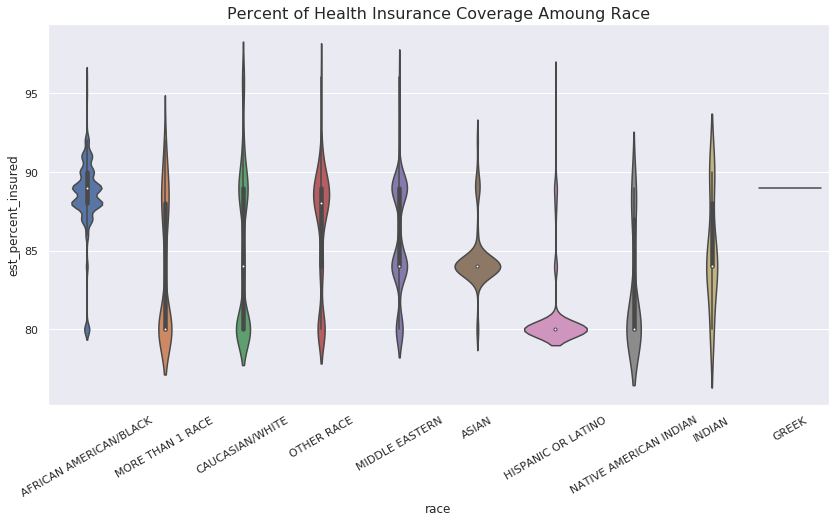

In [ ]:
cities = ['Bingham Farms','Detroit','Dearborn','Southfield','Warren','Dearborn Heights']
cities = [x.upper() for x in cities]
insurance_eye_df = insurance_eye_df[insurance_eye_df.city.isin(cities)]

f, ax = plt.subplots(figsize=(14, 7))

sns.violinplot(x=insurance_eye_df.race, y=insurance_eye_df.est_percent_insured)
plt.title("Percent of Health Insurance Coverage Amoung Race", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


Above is a violin plot that shows the distribution of health insurance coverage amoung race based on the zip code they are located. The most intersting seems to be for the race 'Greek' as it is a small line which could mean all the patients that were Greek came from the same zip code.

A groupby was done on the insurance converage based on city and race. The count and mean were calculated and it shows that the race that was most insured in the city of Detroit was Greek but it only had five samples while next in line for highest was African American with a lot more samples.

In [ ]:
insurance_eye_df = insurance_eye_df.groupby(['city','race']).agg({'est_percent_insured' : ['count', 'mean']}, inplace=True).sort_values(by=('est_percent_insured', 'mean'), ascending=False)
insurance_eye_df.head(10)


est_percent_insured           
                                             count       mean
city    race                                                 
DETROIT GREEK                                    5  89.000000
        AFRICAN AMERICAN/BLACK               21349  88.436601
        OTHER RACE                             595  86.477311
        MIDDLE EASTERN                         909  85.525853
        CAUCASIAN/WHITE                       1859  85.044110
        INDIAN                                  23  84.956522
        ASIAN                                  237  84.540084
        MORE THAN 1 RACE                       261  83.965517
        NATIVE AMERICAN INDIAN                  41  82.317073
        HISPANIC OR LATINO                    2723  80.808300

We wanted to find the frequency between the 'sex' and 'status' based on CAN to determin which sex cancelled the most

In [ ]:
med_school_df_CAN=med_school_df[med_school_df['status']=='CAN']
med_school_df_CAN['sex'].value_counts()
gender_freq_rel_CAN = pd.crosstab(index=med_school_df_CAN['sex'], columns=['Rel. Freq.'], colnames=[''], normalize=True)
gender_freq_rel_CAN

,Rel. Freq.
sex,
F,0.636535
M,0.363465


The graph below shows the count of race to specialty

Text(0.5, 0.98, 'Count of Results Grouped by Specialty Type')

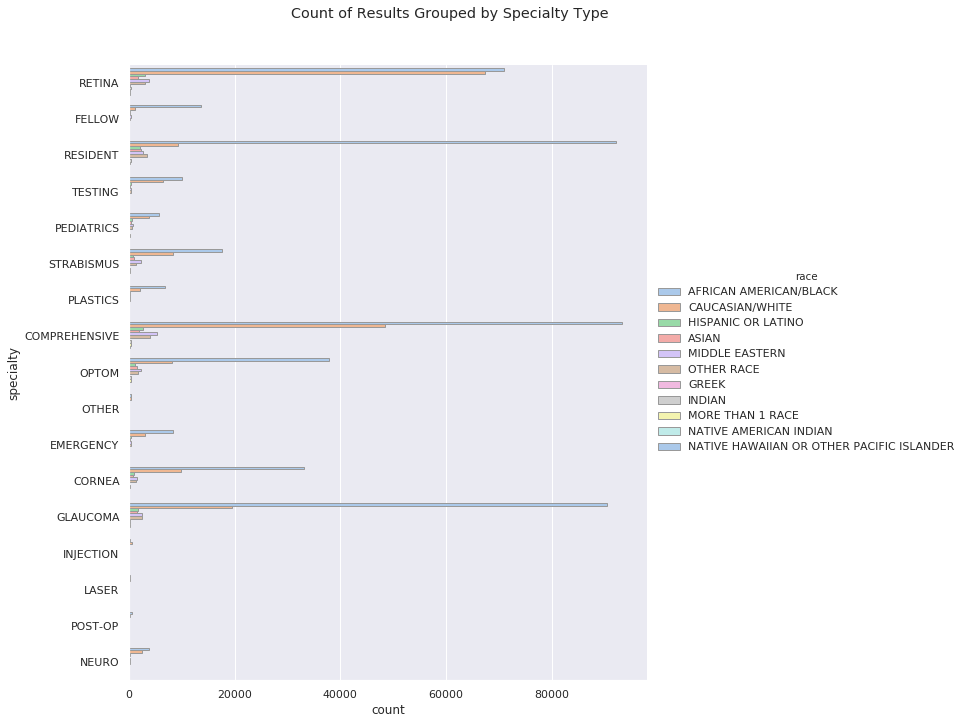

In [ ]:
med_school_df['race'].value_counts()

ax = sns.catplot(y="specialty", hue="race", kind="count",
            palette="pastel", edgecolor=".6",
            data=med_school_df,
            height=10)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Count of Results Grouped by Specialty Type')


Based on the race we found out the avg 'age' which goes to see the doctor and looks like Greek is the hightest number

In [ ]:
race_age = med_school_df[['race', 'age']]
race_age_avg = race_age.groupby('race').mean()
race_age_avg.sort_values(by='age',ascending=False)

,age
race,
GREEK,71.250938
CAUCASIAN/WHITE,61.847069
NATIVE AMERICAN INDIAN,58.109280
AFRICAN AMERICAN/BLACK,57.506874
HISPANIC OR LATINO,51.108955
OTHER RACE,50.994564
MIDDLE EASTERN,50.411598
ASIAN,49.435719
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,48.698639


Based on the 6 cities we decided to foucs on, the below graph shows the amount of specilaties in those areas

Text(0.5, 0.98, 'Count of Results Grouped by Specialty Type')

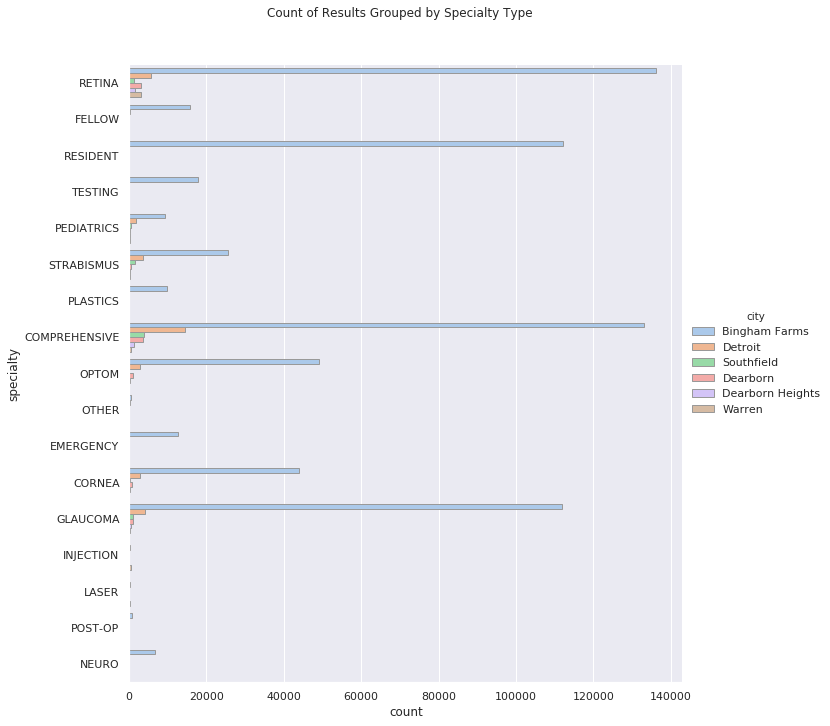

In [ ]:
ax = sns.catplot(y="specialty", hue="city", kind="count",
            palette="pastel", edgecolor=".6",
            data=med_school_df,
            height=10)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Count of Results Grouped by Specialty Type')

There is an "I" value for gender. In order to continue our analysis we will drop the "I" value

In [ ]:
med_school_df['sex'].value_counts()

F    454113
M    294655
I         8
Name: sex, dtype: int64

In [ ]:
med_school_df.drop(med_school_df[med_school_df['sex']=='I'].index, inplace=True)
med_school_df['sex'].value_counts()
gender_freq_rel = pd.crosstab(index=med_school_df['sex'], columns=['Rel. Freq.'], colnames=[''], normalize=True)
gender_freq_rel

,Rel. Freq.
sex,
F,0.60648
M,0.39352


The below chart represents the frequency of doctors appointments between male and female from 2014 to 2018. In order to be able to determine the frequency of the appontment, we had to add a column that reports only the year of the year in which each appontment was set.



In [ ]:
med_school_df['appt_year'] = pd.DatetimeIndex(med_school_df['appt_date']).year
med_school_df.head(3)

,race,appt_date,age,status,sex,zip_code,city,specialty,appt_year
2,AFRICAN AMERICAN/BLACK,3/5/2018,64.400002,ARR,F,48025,Bingham Farms,RETINA,2018
3,AFRICAN AMERICAN/BLACK,12/3/2018,65.099998,ARR,F,48025,Bingham Farms,RETINA,2018
4,AFRICAN AMERICAN/BLACK,10/9/2017,36.799999,CAN,F,48025,Bingham Farms,RETINA,2017


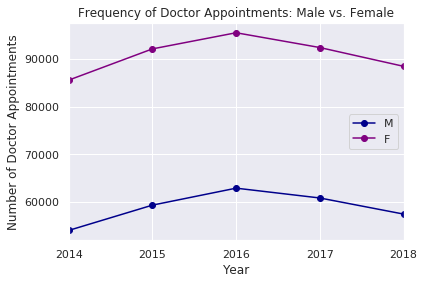

In [ ]:
male_year_freq = (pd.crosstab(index=med_school_df.loc[med_school_df['sex']=='M','appt_year'],columns='Male Freq.',normalize=False).loc[:, 'Male Freq.'])
female_year_freq = (pd.crosstab(index=med_school_df.loc[med_school_df['sex']=='F','appt_year'],columns='Female Freq.',normalize=False).loc[:, 'Female Freq.'])
ax = male_year_freq.plot(marker='o', color='darkblue')
female_year_freq.plot(marker='o', color='purple', ax=ax, legend=False)
ax.legend(['M', 'F'])
ax.locator_params(integer=True)
plt.title('Frequency of Doctor Appointments: Male vs. Female')
plt.xlabel('Year')
plt.ylabel('Number of Doctor Appointments')
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

Based on the race we build a correlation to find out how many NOS




In [ ]:
med_school_df_NOS=med_school_df[med_school_df['status']=='NOS']
med_school_df_NOS['race'].value_counts()
race_freq_rel_NOS = pd.crosstab(index=med_school_df_CAN['race'], columns=['Rel. Freq.'], colnames=[''], normalize=True)
race_freq_rel_NOS.apply(lambda p: np.round(p, 3))


,Rel. Freq.
race,
AFRICAN AMERICAN/BLACK,0.626
ASIAN,0.015
CAUCASIAN/WHITE,0.282
GREEK,0.001
HISPANIC OR LATINO,0.017
INDIAN,0.003
MIDDLE EASTERN,0.027
MORE THAN 1 RACE,0.003
NATIVE AMERICAN INDIAN,0.001


Based on the race we build a correlation to find out how many CAN



In [ ]:
med_school_df_CAN=med_school_df[med_school_df['status']=='CAN']
med_school_df_CAN['race'].value_counts()
race_freq_rel_CAN = pd.crosstab(index=med_school_df_CAN['race'], columns=['Rel. Freq.'], colnames=[''], normalize=True)
race_freq_rel_CAN.apply(lambda p: np.round(p, 3))

,Rel. Freq.
race,
AFRICAN AMERICAN/BLACK,0.626
ASIAN,0.015
CAUCASIAN/WHITE,0.282
GREEK,0.001
HISPANIC OR LATINO,0.017
INDIAN,0.003
MIDDLE EASTERN,0.027
MORE THAN 1 RACE,0.003
NATIVE AMERICAN INDIAN,0.001


Based on the sex we build a correlation to find out how many ARR

In [ ]:
med_school_df_ARR=med_school_df[med_school_df['status']=='ARR']
med_school_df_ARR['sex'].value_counts()
race_freq_rel_ARR = pd.crosstab(index=med_school_df_CAN['sex'], columns=['Rel. Freq.'], colnames=[''], normalize=True)
race_freq_rel_ARR.apply(lambda p: np.round(p, 3))

,Rel. Freq.
sex,
F,0.637
M,0.363


Based on the weather dataset gathered for Bingham Farms, Detroit, Dearborn,Southfield, Warren and Dearborn Heights (https://www.wunderground.com/weather/us/mi/) some CAN and NOS were related to the weather.

In [ ]:
merge_df = pd.merge(weather_df, med_school_df[['city','status','appt_date', 'race','age']], on='city')
merge_df['status'].value_counts()
merge_df = merge_df[merge_df.status.isin(['CAN','NOS'])]
merge_df = merge_df[merge_df.city.isin(['Detroit'])]
merge_df

,city,date,temp_avg,wind_speed_avg,precipitation,status,appt_date,race,age
61652072,Detroit,1/1/2015,25.3,16.5,0.00,NOS,7/3/2017,AFRICAN AMERICAN/BLACK,61.200001
61652073,Detroit,1/1/2015,25.3,16.5,0.00,CAN,8/29/2016,AFRICAN AMERICAN/BLACK,53.799999
61652074,Detroit,1/1/2015,25.3,16.5,0.00,CAN,8/14/2017,AFRICAN AMERICAN/BLACK,54.799999
61652077,Detroit,1/1/2015,25.3,16.5,0.00,CAN,2/6/2017,AFRICAN AMERICAN/BLACK,47.700001
61652078,Detroit,1/1/2015,25.3,16.5,0.00,NOS,1/9/2017,AFRICAN AMERICAN/BLACK,43.200001
...,...,...,...,...,...,...,...,...,...
64892605,Detroit,3/31/2015,37.7,8.8,0.23,NOS,8/5/2015,AFRICAN AMERICAN/BLACK,57.900002
64892606,Detroit,3/31/2015,37.7,8.8,0.23,NOS,12/2/2015,AFRICAN AMERICAN/BLACK,57.799999
64892607,Detroit,3/31/2015,37.7,8.8,0.23,CAN,1/15/2014,AFRICAN AMERICAN/BLACK,57.700001
64892608,Detroit,3/31/2015,37.7,8.8,0.23,CAN,1/29/2014,AFRICAN AMERICAN/BLACK,61.500000


As the table below shows, during March for the city of Detroit the weather was below 40 degrees and most patients where above 50 so it was too cold for them to make the appointment.

In [ ]:
merge_df.sort_values("city", inplace = True)
filter1 = merge_df["city"]=="Detroit"
filter2 = merge_df["appt_date"]=="3/31/2015"
filter3 = merge_df["temp_avg"] < 40
filter4 = merge_df["date"] =="3/31/2015"
merge_df.where(filter1 & filter2 & filter3 & filter4, inplace = True)
merge_df.head(20)

,city,date,temp_avg,wind_speed_avg,precipitation,status,appt_date,race,age
64883622,Detroit,3/31/2015,37.7,8.8,0.23,NOS,3/31/2015,AFRICAN AMERICAN/BLACK,61.000000
64865429,Detroit,3/31/2015,37.7,8.8,0.23,CAN,3/31/2015,AFRICAN AMERICAN/BLACK,13.700000
64865450,Detroit,3/31/2015,37.7,8.8,0.23,NOS,3/31/2015,HISPANIC OR LATINO,19.600000
64866790,Detroit,3/31/2015,37.7,8.8,0.23,CAN,3/31/2015,AFRICAN AMERICAN/BLACK,15.900000
64866534,Detroit,3/31/2015,37.7,8.8,0.23,CAN,3/31/2015,AFRICAN AMERICAN/BLACK,25.500000
64866701,Detroit,3/31/2015,37.7,8.8,0.23,CAN,3/31/2015,AFRICAN AMERICAN/BLACK,11.600000
64859215,Detroit,3/31/2015,37.7,8.8,0.23,NOS,3/31/2015,AFRICAN AMERICAN/BLACK,11.700000
64859271,Detroit,3/31/2015,37.7,8.8,0.23,NOS,3/31/2015,AFRICAN AMERICAN/BLACK,3.600000
64859699,Detroit,3/31/2015,37.7,8.8,0.23,CAN,3/31/2015,AFRICAN AMERICAN/BLACK,7.300000
64859700,Detroit,3/31/2015,37.7,8.8,0.23,CAN,3/31/2015,AFRICAN AMERICAN/BLACK,7.300000


The table below also shows the correlation between status and city with the weather below 40 degree

In [ ]:
merge_df.sort_values("city", inplace = True)
filter1 = merge_df["city"]=="Detroit"
#filter2 = merge_df["status"]=="CAN"
filter3 = merge_df["temp_avg"] < 40
merge_df.where(filter1 & filter3, inplace = True)
merge_df.head(10)

,city,date,temp_avg,wind_speed_avg,precipitation,status,appt_date,race,age
61652072,Detroit,1/1/2015,25.3,16.5,0.0,NOS,7/3/2017,AFRICAN AMERICAN/BLACK,61.200001
63812438,Detroit,3/2/2015,27.1,7.2,0.0,NOS,1/9/2017,AFRICAN AMERICAN/BLACK,43.200001
63812437,Detroit,3/2/2015,27.1,7.2,0.0,CAN,2/6/2017,AFRICAN AMERICAN/BLACK,47.700001
63812434,Detroit,3/2/2015,27.1,7.2,0.0,CAN,8/14/2017,AFRICAN AMERICAN/BLACK,54.799999
63812433,Detroit,3/2/2015,27.1,7.2,0.0,CAN,8/29/2016,AFRICAN AMERICAN/BLACK,53.799999
63812432,Detroit,3/2/2015,27.1,7.2,0.0,NOS,7/3/2017,AFRICAN AMERICAN/BLACK,61.200001
63812429,Detroit,3/1/2015,21.4,4.6,0.0,CAN,2/19/2014,CAUCASIAN/WHITE,77.699997
63812428,Detroit,3/1/2015,21.4,4.6,0.0,CAN,1/29/2014,AFRICAN AMERICAN/BLACK,61.500000
63812427,Detroit,3/1/2015,21.4,4.6,0.0,CAN,1/15/2014,AFRICAN AMERICAN/BLACK,57.700001
63812439,Detroit,3/2/2015,27.1,7.2,0.0,NOS,6/4/2018,AFRICAN AMERICAN/BLACK,42.400002
